In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read relative file: https://www.kaggle.com/rtatman/reproducibility-tips-absolute-vs-relative-paths
#df = pd.read_csv('C:/Users/maria/Documents/UFAL/Ciencia de dados/Projeto/data/APOSENTADOS_112020_FULL.csv',low_memory=False, error_bad_lines=False, sep=';')
df = pd.read_csv(r'../datasets/APOSENTADOS_112020_FULL.csv', sep=';', low_memory=False)
df.describe()

,Orgao vinculacao,Referencia,Nivel
count,421563.000000,421563.0,421563.000000
mean,14789.565111,0.0,68.770314
std,11442.241897,0.0,190.849455
min,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000
50%,15000.000000,0.0,0.000000
75%,17000.000000,0.0,0.000000
max,54000.000000,0.0,801.000000


In [2]:
df.head()

,Nome,CPF,Matricula,Orgao,Sigla Orgao,Orgao vinculacao,Cargo emprego,Classe,Padrao,Referencia,Nivel,Tipo aposentadoria,Fund legal aposentadoria,Portaria aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
0,ANTONIO ALVES BEZERRA ...,***686441**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE VIGILANCIA,S,II,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 63194 PUBLICADO EM 30DEZ1994 ...,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",NaN,NaN
1,ANTONIO CARLOS CONCEICAO MARTINS ...,***423941**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,ESTATISTICO,S,III,0,0,VOLUNTARIA,CF 40 III A,PORTARIA NO. 26 PUBLICADO EM 31JAN1995 ...,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04",NaN,NaN
2,ARLINDA COSTA GUTEMBERG ...,***063691**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUXILIAR DE ENFERMAGEM,S,III,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 341 PUBLICADO EM 01JUL1990 ...,1071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",NaN,NaN
3,BENTO MOREIRA LIMA JUNIOR ...,***460301**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,APOSENTADORIA POR INVALIDEZ,CF 40 I INT,LEI NO. 21050 PUBLICADO EM 02JUL1990 ...,2071990,ADMISSAO SEM CONCURSO PUBLICO ...,8061961,"19.478,03",NaN,NaN
4,BERENICE MOREIRA SANTOS ...,***021701**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,VOLUNTARIA (ART. 186 ITEM III ALINEA A),PORTARIA NO. 253 PUBLICADO EM 31MAI1990 ...,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92",NaN,NaN


In [3]:
print(df.columns)

Index(['Nome', 'CPF', 'Matricula', 'Orgao', 'Sigla Orgao', 'Orgao vinculacao',
       'Cargo emprego', 'Classe', 'Padrao', 'Referencia', 'Nivel',
       'Tipo aposentadoria', 'Fund legal aposentadoria',
       'Portaria aposentadoria', 'Dt ocorrencia inatividade',
       'Nome ocorrencia', 'Dt ingresso servico publico',
       'Valor aposentadoria                                                                                                                                                            ',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')


In [4]:
#Tratamento dos dados
#Drop colunas que não vão ser usadas
aposentados = df.drop(['Nome', 'CPF', 'Matricula', 'Sigla Orgao', 'Orgao vinculacao', 'Padrao',
        'Referencia', 'Nivel', 'Fund legal aposentadoria', 'Portaria aposentadoria'], axis=1)

In [5]:
# Tirando datas vazias
aposentados.drop(aposentados[aposentados['Dt ocorrencia inatividade'] == '        '].index, inplace = True)
aposentados.drop(aposentados[aposentados['Dt ingresso servico publico'] == '        '].index, inplace = True)

In [6]:
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",NaN,NaN
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04",NaN,NaN
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,1071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",NaN,NaN
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,2071990,ADMISSAO SEM CONCURSO PUBLICO ...,8061961,"19.478,03",NaN,NaN
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92",NaN,NaN


In [7]:
# Inserindo 0 nas datas com 7 dígitos
aposentados['Dt ocorrencia inatividade'] = aposentados['Dt ocorrencia inatividade'].str.zfill(8)
aposentados['Dt ingresso servico publico'] = aposentados['Dt ingresso servico publico'].str.zfill(8)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",NaN,NaN
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04",NaN,NaN
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",NaN,NaN
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,"19.478,03",NaN,NaN
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92",NaN,NaN


In [8]:
# Verificando quantas linhas das colunas de datas tem Nan
print(aposentados['Dt ocorrencia inatividade'].isnull().sum())
print("\n")
print(aposentados['Dt ingresso servico publico'].isnull().sum())

1


0


In [9]:
#aposentados.dropna(subset=['name', 'toy'])

In [16]:
# Transformar data Dt ocorrencia inatividade; Dt ingresso servico publico; em tipo date %d%m%Y
#aposentados['Dt ocorrencia inatividade'] = pd.to_datetime(aposentados['Dt ocorrencia inatividade'], format='%d%m%y')

In [17]:
#aposentados['Dt ingresso servico publico'] = pd.to_datetime(aposentados['Dt ingresso servico publico'],format='%d%m%Y')

In [18]:
#Coletando informações necessárias para os plots

# Tipos de aposentadorias apresentadas
tipo_aposentadoria = aposentados['Tipo aposentadoria'].value_counts()

# Selecionando apenas os registros de aposentadoria por invalidez
tipo_invalidez = aposentados.loc[aposentados['Tipo aposentadoria'] == 'APOSENTADORIA POR INVALIDEZ']

# Selecionando os cargos que tem registro de aposentadoria por invalidez e
# que pertence ao orgão ministério da saúde
tipo_invalidez_orgao_cargos = aposentados.loc[aposentados['Orgao'] == 'MINISTERIO DA SAUDE                     ']

#Selecionando os tipos de cargos que tem no Ministerio da Saude que se aposentaram por invalidez
tipo_cargos_invalidez = tipo_invalidez_orgao_cargos['Cargo emprego'].value_counts()

#Selecionando os Orgaos que tem aposentadoria por invalidez e contando sua ocorrencia
tipo_invalidez_orgao = tipo_invalidez['Orgao'].value_counts()

#Seleciona os valores dos salários 



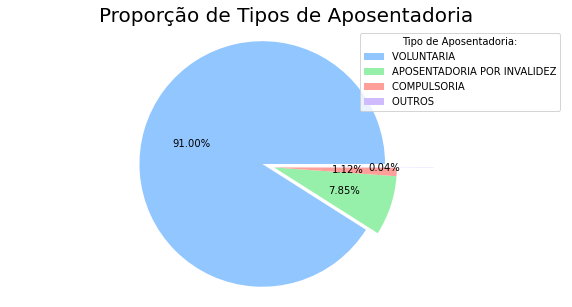

In [13]:
#Criando os gráficos
#Proporção de Tipos de Aposentadorias
plt.figure(figsize=(10,5))
plt.style.use('seaborn-pastel')
plt.title('Proporção de Tipos de Aposentadoria', size=20)
explode = (0.1, 0, 0, 0.3)
plt.pie(tipo_aposentadoria.values,explode=explode, autopct='%1.2f%%')
plt.legend(labels = tipo_aposentadoria.index,title = "Tipo de Aposentadoria:")
plt.axis('equal')
plt.show()

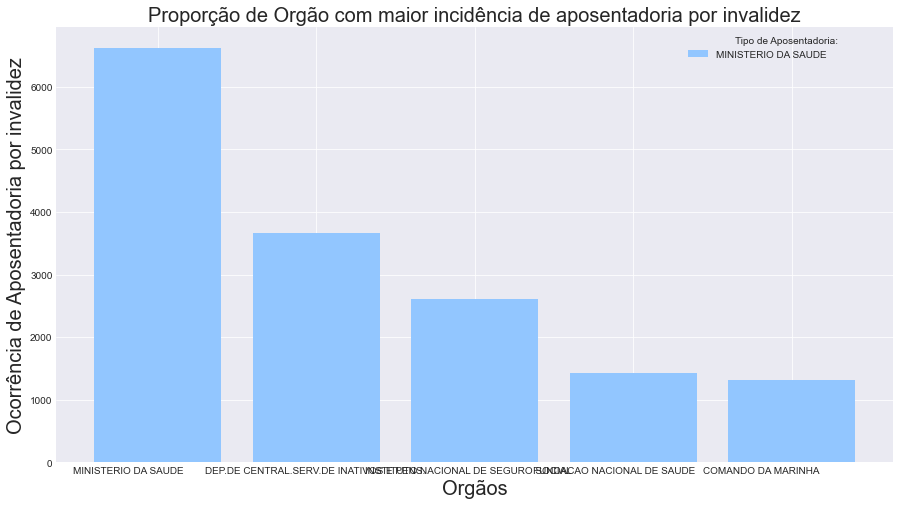

In [14]:
#Grafico que apresenta a quantidade de aposentadoria por invalidez
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.bar(tipo_invalidez_orgao.index[:5],tipo_invalidez_orgao.values[:5])
plt.title('Proporção de Orgão com maior incidência de aposentadoria por invalidez', size=20)
plt.legend(title = "Tipo de Aposentadoria:",labels = tipo_invalidez_orgao.index[:5])
plt.xlabel('Orgãos', size=20)
plt.ylabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.show()

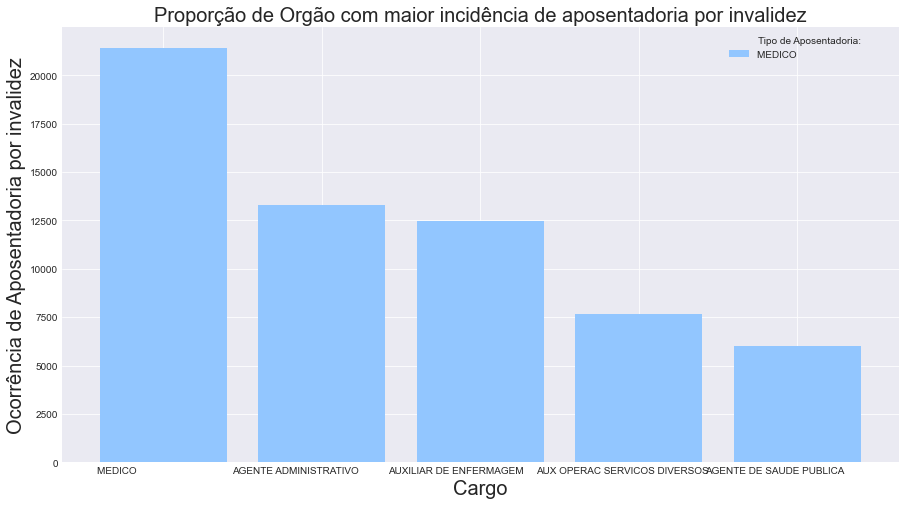

In [15]:
#Grafico que apresenta os cargos e a quantidade de pessoas aposentadas por invalidez que trabalham no Ministerio da Saude
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.bar(tipo_cargos_invalidez.index[:5],tipo_cargos_invalidez.values[:5])
plt.title('Proporção de Orgão com maior incidência de aposentadoria por invalidez', size=20)
plt.legend(title = "Tipo de Aposentadoria:",labels = tipo_cargos_invalidez.index[:5])
plt.xlabel('Cargo', size=20)
plt.ylabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.show()